<a href="https://colab.research.google.com/github/roboGOD/iisc-dsp-stock-price-prediction/blob/main/src/02-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Importing processed data

In [2]:
import pandas as pd
df = pd.read_csv('merged_data.csv')
df.head()

,date,adj_close,close,high,low,open,volume,ticker,revenues,cost_of_goods,...,current_ratio,debt_to_equity_ratio,ebitda_margin,gross_margin,net_income_margin,dividend_yield,payout_ratio,return_on_assets,return_on_equity,return_on_capital
0,2010-04-01,7.108997,8.427500,8.526071,8.312500,8.478929,603145200.0,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
1,2010-04-05,7.184915,8.517500,8.518214,8.384643,8.392143,684507600.0,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
2,2010-04-06,7.216546,8.555000,8.580000,8.464286,8.507143,447017200.0,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
3,2010-04-07,7.248483,8.592857,8.640000,8.523571,8.555357,628502000.0,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
4,2010-04-08,7.228898,8.569643,8.626429,8.501429,8.587143,572989200.0,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877


### Plot close price

This code is used to visualize the historical closing prices of Apple Inc. (AAPL) stock over time. It first converts the `date` column in the DataFrame to datetime objects, ensuring proper handling of time-based data. Then, a line plot is generated with the `date` on the x-axis and the closing prices (`close`) on the y-axis. The plot is labeled with "date" for the x-axis and "Close Price" for the y-axis, and the title "AAPL Close Price" is added to the chart. Finally, the plot is displayed to help identify trends, fluctuations, and patterns in the stock's performance over the selected time period.

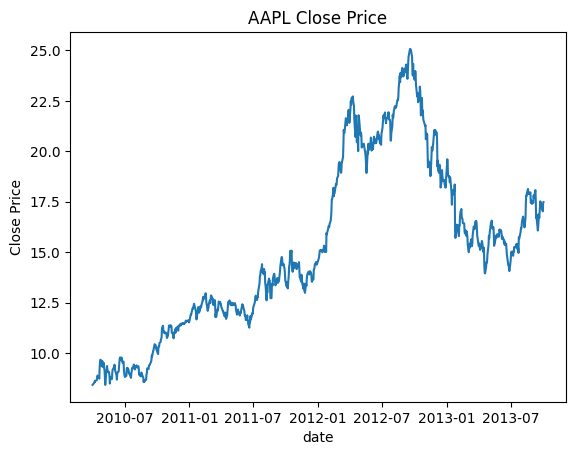

In [3]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Plot the filtered data
plt.plot(df['date'], df['close'])
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price')
plt.show()

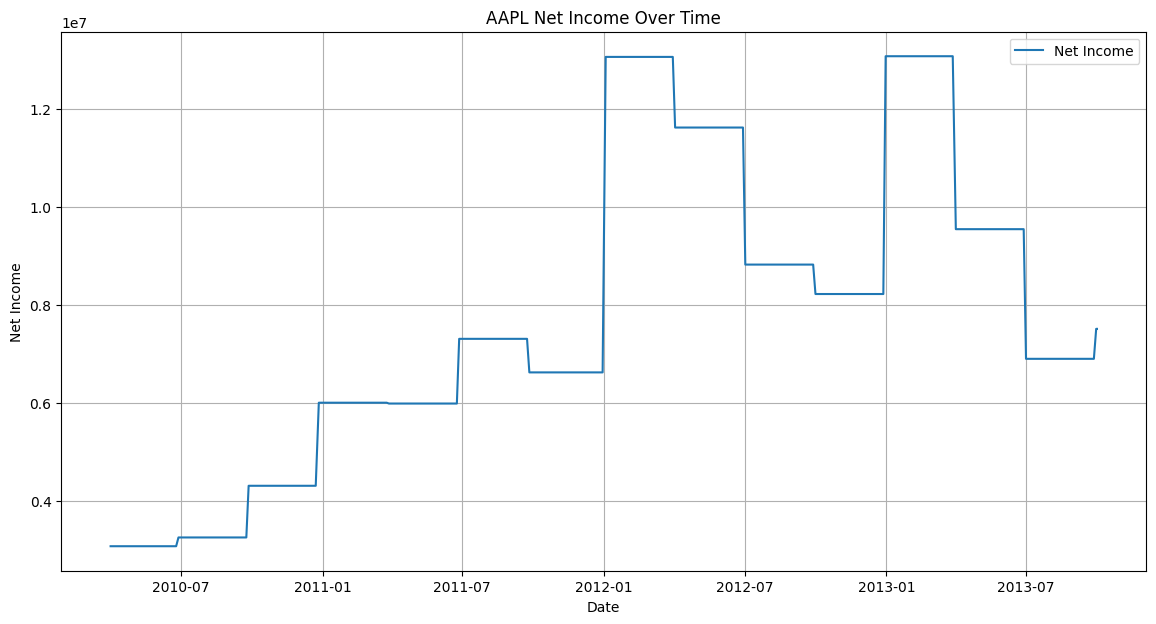

In [4]:
if 'net_income' in df.columns:
  plt.figure(figsize=(14, 7))
  plt.plot(df['date'], df['net_income'], label='Net Income')
  plt.xlabel('Date')
  plt.ylabel('Net Income')
  plt.title('AAPL Net Income Over Time')
  plt.legend()
  plt.grid(True)
  plt.show()

### Normalized Net Income

- **Normalize 'Close' and 'Net Income' Columns**  
  - The `close` and `net_income` columns are normalized using Min-Max scaling, which transforms the values to a range between 0 and 1:
    - `normalized_close`: Scales the `close` prices.
    - `normalized_net_income`: Scales the `net_income` values.

- **Plot Normalized Data**  
  - A plot is created with the `date` on the x-axis and the normalized values (`normalized_close` and `normalized_net_income`) on the y-axis.
  - The line for `normalized_close` is labeled as "Normalized Close Price," and the line for `normalized_net_income` is labeled as "Normalized Net Income."
  
- **Add Labels and Title**  
  - The x-axis is labeled as "Date," and the y-axis is labeled as "Normalized Value."
  - The title of the plot is set to "Normalized Close Price vs. Normalized Net Income."

- **Add Grid and Legend**  
  - A grid is added for better readability, and a legend is included to differentiate the two lines in the plot.

- **Display the Plot**  
  - `plt.show()` is called to display the final plot.


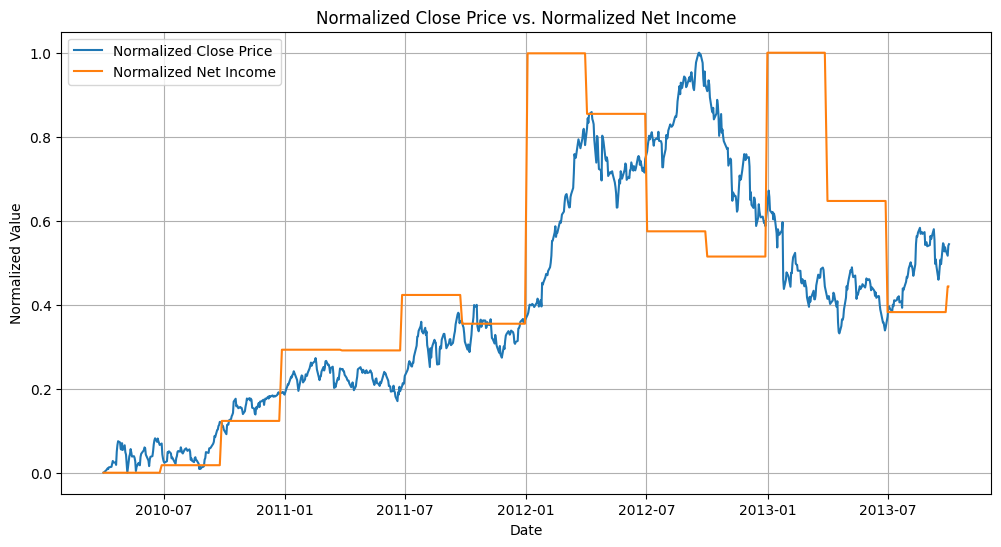

In [5]:
df['normalized_close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())
df['normalized_net_income'] = (df['net_income'] - df['net_income'].min()) / (df['net_income'].max() - df['net_income'].min())

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['normalized_close'], label='Normalized Close Price')
plt.plot(df['date'], df['normalized_net_income'], label='Normalized Net Income')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Close Price vs. Normalized Net Income')
plt.legend()
plt.grid(True)
plt.show()

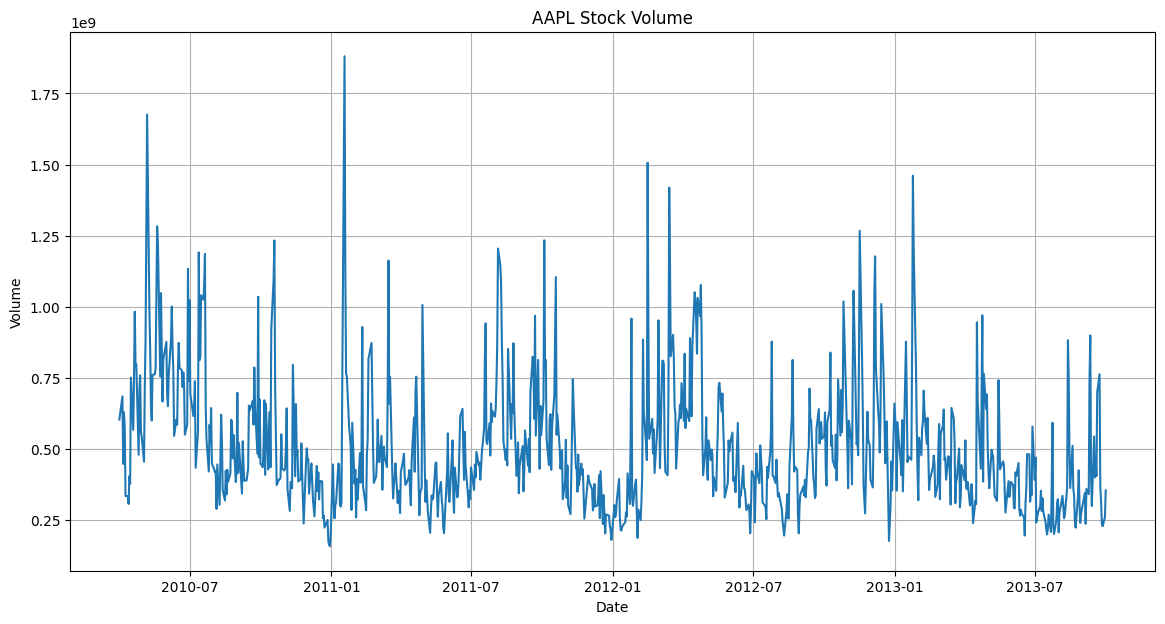

In [6]:
# Plotting Volume
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Stock Volume')
plt.grid(True)
plt.show()

### Calculate Moving Average

- **Define Moving Average Period**  
  - `mavgd` is set to 30, specifying the number of days for the moving average calculation.

- **Calculate Moving Average**  
  - The function `calculate_moving_average()` computes the moving average for the 'close' prices using a rolling window of size `window`. It creates a new column in the DataFrame, labeled `{window}_DMA`, representing the moving average for the specified window.

- **Apply Moving Average Calculation**  
  - The function is applied to the DataFrame `df` with the moving average period (`mavgd = 30`), creating a new column called `30_DMA` containing the 30-day moving average of the 'close' price.

- **Plot Close Price and Moving Average**  
  - A plot is created with the `date` on the x-axis and both the `close` price and the calculated moving average (`30_DMA`) on the y-axis.
  - The plot displays two lines: one for the "Close Price" and another for the "30-Day Moving Average."

- **Add Labels and Title**  
  - The x-axis is labeled as "Date," and the y-axis is labeled as "Price."
  - The title of the plot is dynamically set to "AAPL Close Price and 30-Day Moving Average."

- **Add Grid and Legend**  
  - A grid is added to the plot for better readability, and a legend is included to differentiate between the "Close Price" and "30-Day Moving Average."

- **Display the Plot**  
  - `plt.show()` is called to display the final plot.


In [7]:
mavgd = 30 # Moving average days

def calculate_moving_average(df, window):
    df[f'{window}_DMA'] = df['close'].rolling(window=window, min_periods=1).mean()
    return df


df = calculate_moving_average(df, mavgd)

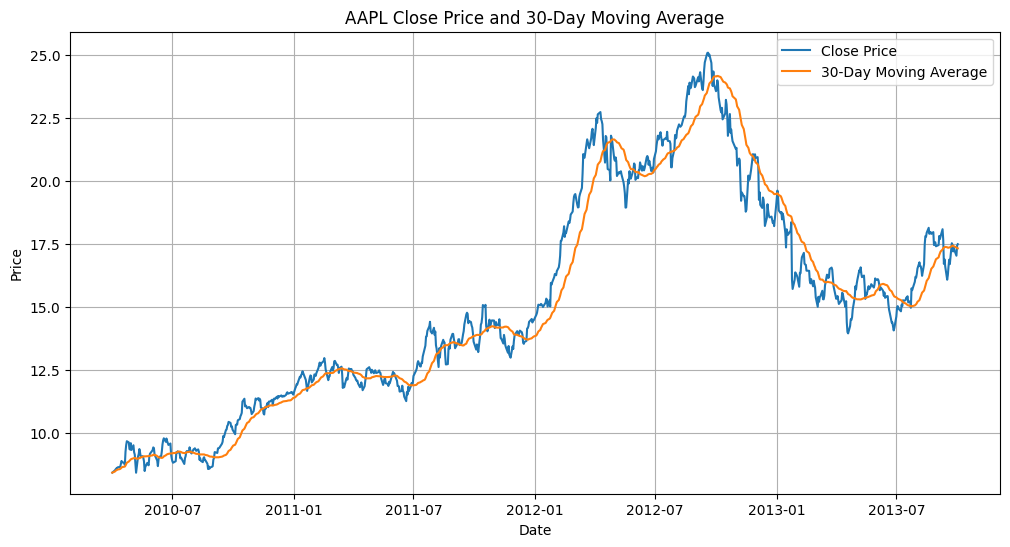

In [8]:
# Plot the 'close' and '{mavgd}_DMA' columns against the 'date'
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df[f'{mavgd}_DMA'], label=f'{mavgd}-Day Moving Average')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'AAPL Close Price and {mavgd}-Day Moving Average')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

### Label Generation

- **Define Moving Average Period for Label Generation**  
  - `labels_moving_average_days` is set to 10, specifying the number of days for the rolling average calculation used to generate the buy/sell signals.

- **Calculate Moving Average**  
  - The 10-day rolling average of the `close` price is calculated using the `rolling(window=labels_moving_average_days)` method, and a new column, `10_Day_Avg`, is added to the DataFrame to store this value.

- **Shift the Moving Average**  
  - The `10_Day_Avg` column is shifted down by 10 days (using `.shift(-labels_moving_average_days)`) to compare each day's close price with the next 10-day moving average. This shifted average is stored in a new column, `Next_10_Day_Avg`.

- **Generate Buy/Sell Signals**  
  - A new column, `signal`, is created and initialized with a default value of "SELL."
  - A condition is applied to identify where the `close` price is lower than the `Next_10_Day_Avg`. For these rows, the `signal` column is updated to "BUY."

This code is used to create a simple trading strategy based on comparing a stock's close price with its future moving average to generate buy and sell signals.


In [9]:
labels_moving_average_days = 10

# Calculate the {labels_moving_average_days}-day rolling average of the 'Close' price
df[f'{labels_moving_average_days}_Day_Avg'] = df['close'].rolling(window=labels_moving_average_days).mean()

# Shift the {labels_moving_average_days}-day average column down by one position to compare with the next {labels_moving_average_days} average
df[f'Next_{labels_moving_average_days}_Day_Avg'] = df[f'{labels_moving_average_days}_Day_Avg'].shift(-labels_moving_average_days)

# Create the 'Signal' column based on the comparison
df['signal'] = 'SELL'
df.loc[df['close'] < df[f'Next_{labels_moving_average_days}_Day_Avg'], 'signal'] = 'BUY'


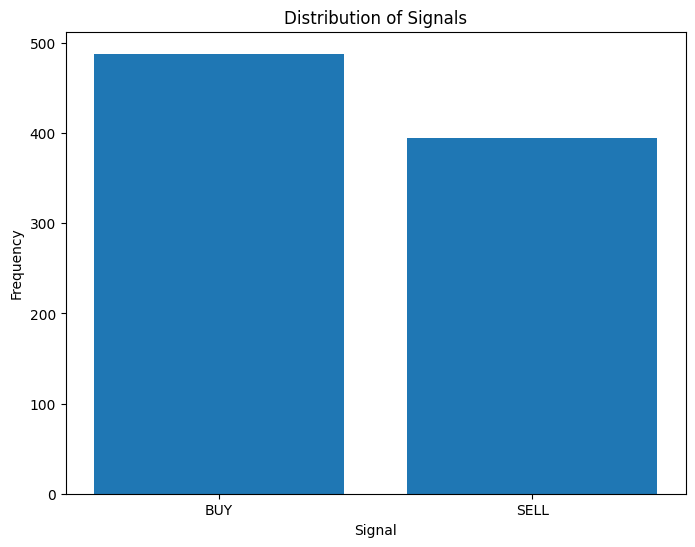

In [10]:
# Count the occurrences of each signal
signal_counts = df['signal'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(signal_counts.index, signal_counts.values)
plt.xlabel("Signal")
plt.ylabel("Frequency")
plt.title("Distribution of Signals")
plt.show()

### Scatter Plot for BUY/SELL signals

- **Purpose of Buy/Sell Signals**  
  The code generates buy and sell signals based on the comparison between the current stock price and its moving average. These signals can be used to develop a simple trading strategy:
  - **BUY**: When the current price is below the future moving average, it suggests a potential upward movement, and a "BUY" signal is generated.
  - **SELL**: When the current price is above the future moving average, it indicates that the price might decline, and a "SELL" signal is generated.

- **Plotting Buy and Sell Signals**  
  The plot visualizes these buy and sell signals on the stock's price chart:
  - **Green Circles (BUY Signals)**: Represent points where the stock price is below the expected moving average, suggesting a buying opportunity.
  - **Red Circles (SELL Signals)**: Represent points where the stock price is above the expected moving average, indicating a potential selling point.

### What the Plot Shows

- The plot displays the stock’s closing price over time, with **green dots** indicating where the algorithm suggests buying the stock, and **red dots** marking suggested sell points.
- The x-axis represents the **date**, showing the timeline over which these decisions were made, while the y-axis represents the **close price** of the stock.
- The combination of the price trend and these signals can help visualize potential entry and exit points for a trading strategy based on historical price movements and moving averages.


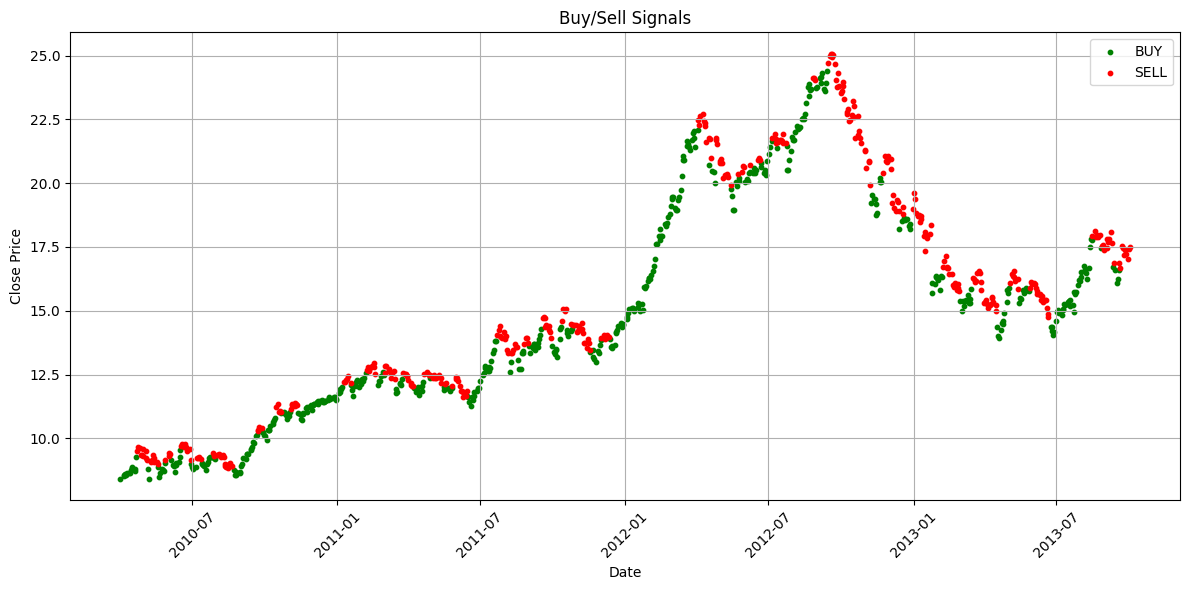

In [11]:
plt.figure(figsize=(12, 6))

# Plot BUY signals
plt.scatter(df[df['signal'] == 'BUY']['date'], df[df['signal'] == 'BUY']['close'],
            marker='o', color='green', label='BUY', s=10)
# Plot SELL signals
plt.scatter(df[df['signal'] == 'SELL']['date'], df[df['signal'] == 'SELL']['close'],
            marker='o', color='red', label='SELL', s=10)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Buy/Sell Signals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Find Cumulative Profit

The code simulates a simple trading strategy where buy and sell signals are used to track the cumulative profit of a stock position. The goal is to calculate the profit from buying and selling stocks based on a series of buy and sell signals.

- **Initialization**:  
  The following variables are initialized to track the trading process:
  - `stock_quantity`: Tracks how many stocks are held at any given point in time.
  - `total_buy_price`: Tracks the total price spent on buying stocks.
  - `stock_profit`: Tracks the profit made from each sell transaction.
  - `quantity` and `buy_price` are set to 0 initially, representing no stock purchased.

- **Iterating Through the Data**:  
  The code then iterates over each row of the DataFrame (`df`), simulating trading based on buy (`'BUY'`) and sell (`'SELL'`) signals.
  
  - **When the signal is 'BUY'**:  
    - The quantity of stocks held (`quantity`) is increased by 1 (simulating the purchase of one stock).
    - The total buy price (`buy_price`) is updated by adding the stock’s closing price.
    - The DataFrame is updated to reflect the current quantity of stock and total purchase price.

  - **When the signal is 'SELL'** (and there are stocks to sell):  
    - The profit from selling is calculated as:  
      
      Profit = (quantity * current close price) - total buy price
      
    - After selling, the stock quantity and total buy price are reset to 0, and the profit for that sell transaction is recorded in the DataFrame.

  - **When there is no buy or sell signal ('Hold' condition)**:  
    - If no action is taken (i.e., when the signal is not 'BUY' or 'SELL'), the stock holdings and total buy price remain unchanged.

- **Cumulative Profit Calculation**:  
  After processing the signals, the cumulative profit is calculated using `cumsum()`, which returns the running total of profits up to each point in time. The cumulative profit reflects the overall performance of the simulated trading strategy up to each date in the DataFrame.

- This simulation calculates the cumulative profit or loss for a strategy based on buy and sell signals.
- **Cumulative Profit**: The final column, `cumulative_profit`, tracks the total profit from all completed buy/sell transactions as the algorithm progresses through the dataset. This gives a clear picture of how much profit would have been accumulated over time based on the trading signals provided.


In [12]:
import numpy as np

# Initialize variables to track buying and selling
df['stock_quantity'] = 0.0
df['total_buy_price'] = 0.0
df['stock_profit'] = 0.0
quantity = 0.0
buy_price = 0.0

# Iterate through the DataFrame to simulate trading based on signals
for i in range(len(df)):
    if df['signal'][i] == 'BUY':
        # Simulate buying one stock
        quantity += 1
        buy_price += df['close'][i]
        df.loc[i, 'stock_quantity'] = quantity
        df.loc[i, 'total_buy_price'] = buy_price

    elif df['signal'][i] == 'SELL' and quantity > 0:
        # Simulate selling all held stock
        profit = quantity * df['close'][i] - buy_price
        df.loc[i, 'stock_profit'] = profit
        df.loc[i, 'stock_quantity'] = 0  # Reset quantity after selling
        df.loc[i, 'total_buy_price'] = 0  # Reset buy price after selling
        buy_price = 0
        quantity = 0

    else:
        # Hold the stock
        df.loc[i, 'stock_quantity'] = quantity
        df.loc[i, 'total_buy_price'] = buy_price


# Calculate cumulative profit
df['cumulative_profit'] = df['stock_profit'].cumsum()

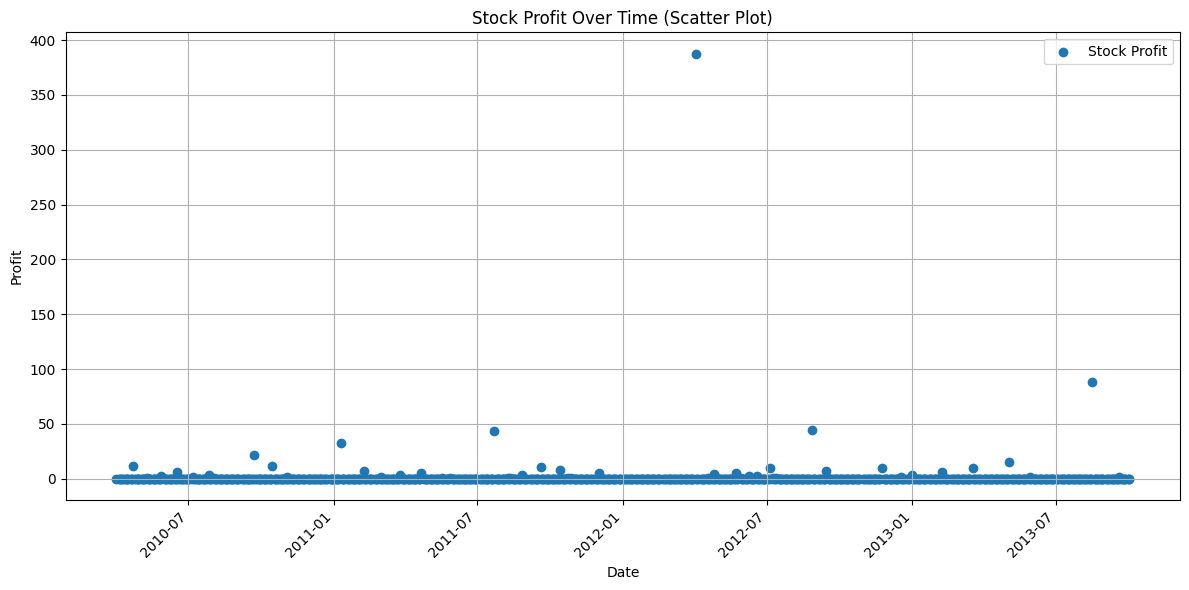

In [13]:
# Scatter plot of stock profit
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['stock_profit'], label='Stock Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Stock Profit Over Time (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

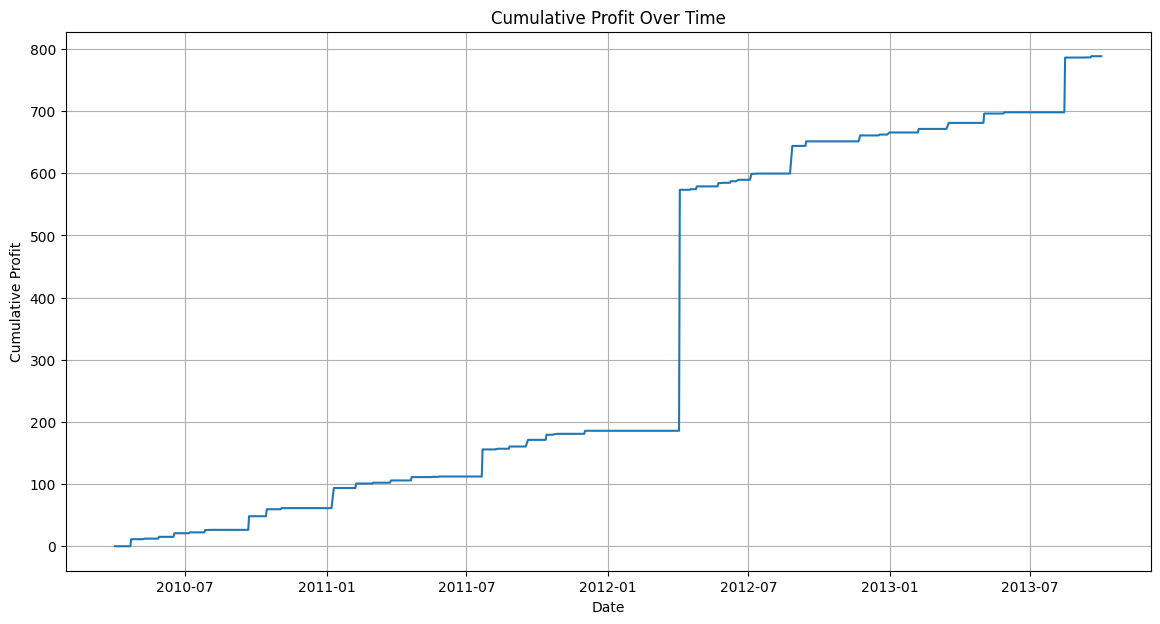

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['cumulative_profit'])
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit Over Time')
plt.grid(True)
plt.show()

## Correlation Analysis

In [25]:
# Drop string columns
df_numeric = df.select_dtypes(exclude=['object', 'datetime64[ns]'])

# Drop columns that are not relevant to correlation analysis with closing price
columns_to_drop = ['stock_quantity', 'total_buy_price', 'stock_profit', 'high', 'low', 'adj_close', 'open',
                   'normalized_close', '10_Day_Avg', 'Next_10_Day_Avg', '30_DMA']
df_numeric = df_numeric.drop(columns=columns_to_drop, errors='ignore')

# Calculate correlation with 'close' price
correlation_with_close = df_numeric.corr()['close'].drop('close')
top_10_correlations = correlation_with_close.abs().sort_values(ascending=False).head(15)

top_10_correlations

,close
enterprise_valuation,0.909312
market_capitalization,0.902676
other_non-current_assets,0.847466
other_intangible_assets,0.811670
goodwill_and_intangible_assets,0.799581
general/admin_expense,0.795966
deferred_revenue_non-current,0.795966
long-term_investments,0.782920
other_assets,0.782469
current_ratio,0.777959


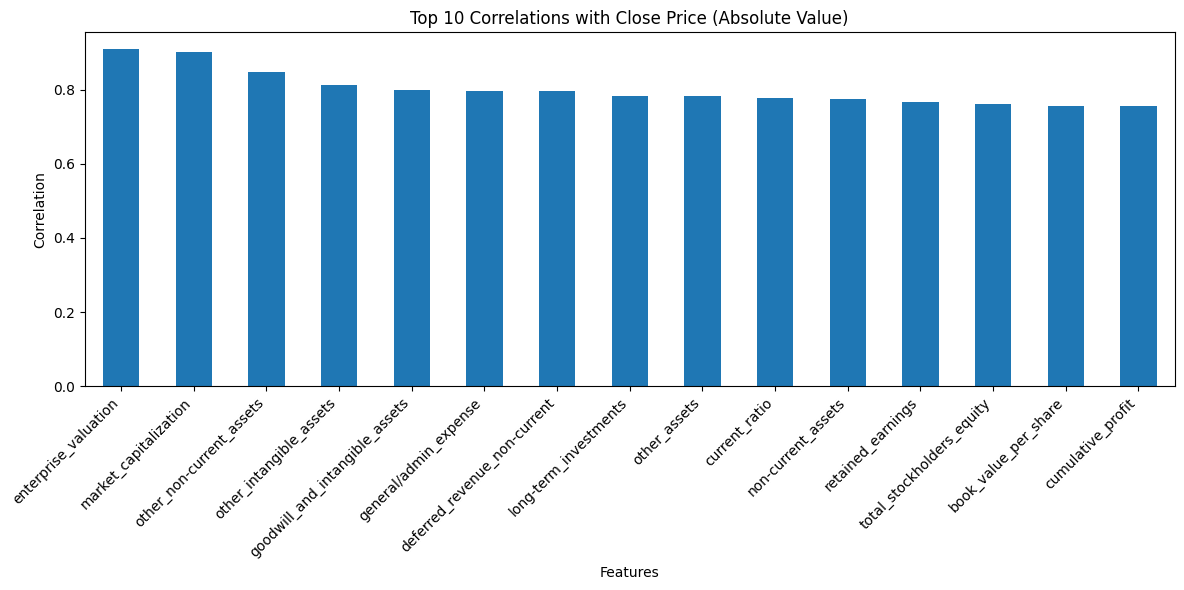

In [26]:
plt.figure(figsize=(12, 6))
top_10_correlations.plot(kind='bar')
plt.title('Top 10 Correlations with Close Price (Absolute Value)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Principal Component Analysis

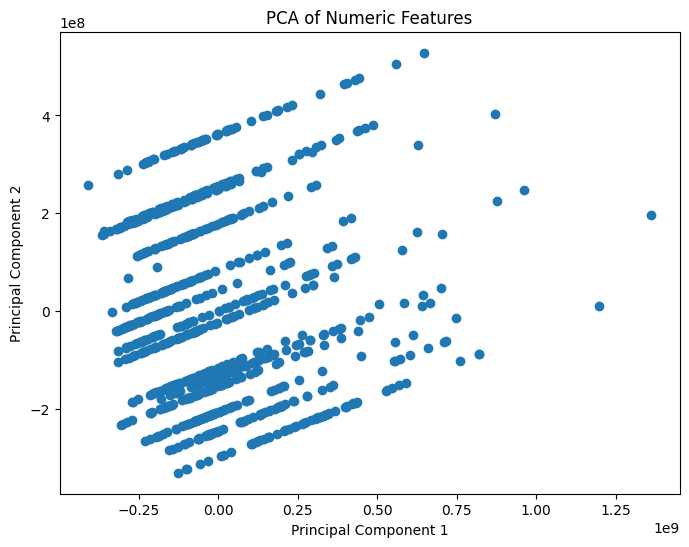

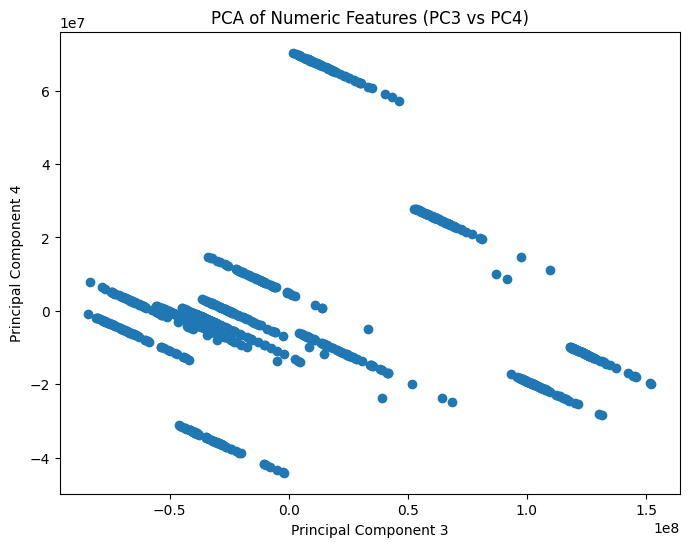

In [31]:
from sklearn.decomposition import PCA

df_numeric_clean = df_numeric.dropna()

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_numeric_clean)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Plot the data (example using PC1 and PC2)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Numeric Features')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC3'], pca_df['PC4'])
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA of Numeric Features (PC3 vs PC4)')
plt.show()

In [35]:
pca_indices = pca_df.index

new_df = df.loc[pca_indices]

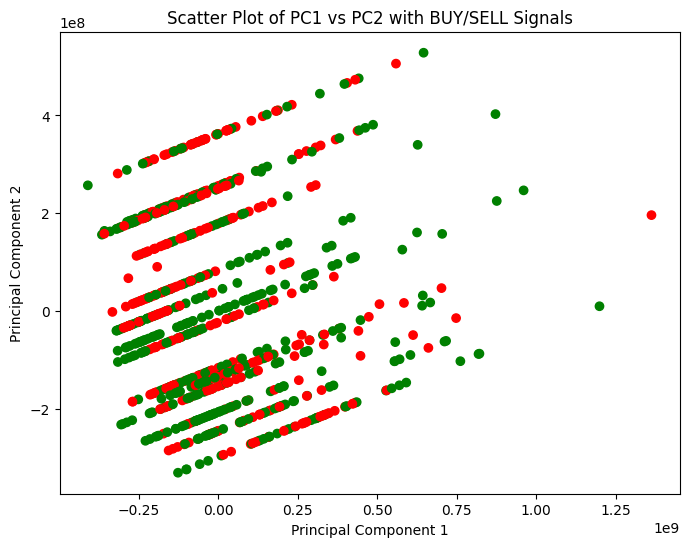

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=new_df['signal'].map({'BUY': 'green', 'SELL': 'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PC1 vs PC2 with BUY/SELL Signals')
plt.show()

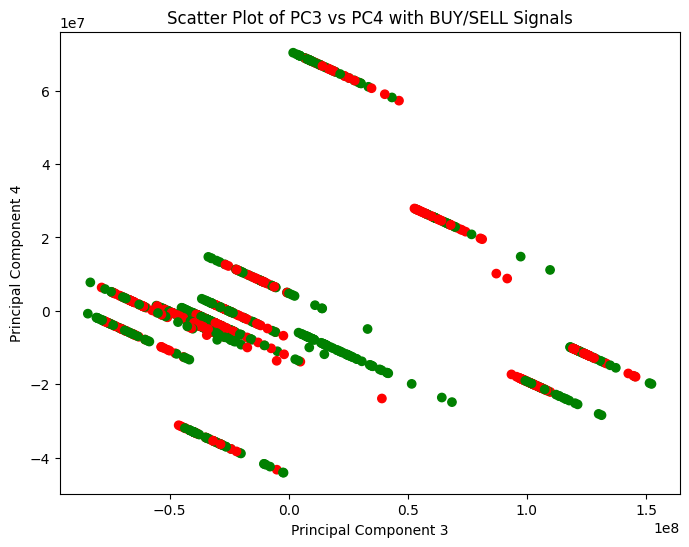

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC3'], pca_df['PC4'], c=new_df['signal'].map({'BUY': 'green', 'SELL': 'red'}))
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('Scatter Plot of PC3 vs PC4 with BUY/SELL Signals')
plt.show()

In [39]:
df.to_csv('eda.csv')
df_numeric.to_csv('numeric_data.csv')
pca_df.to_csv('pca_data.csv')